# Weapons used VS Gender! and state wise weapon analysis !! Combined with gun lisence data for each state. 


In [7]:
import os
from os import listdir
from os.path import isfile, join
import glob
import string
import operator
import csv
import pandas as pd
import calendar
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
homedir = os.path.expanduser("~")
path_to_data = homedir+"\\Final\\Data"
print(path_to_data)

C:\Users\priya\Final\Data


In [10]:
for subdir,dirs, files in os.walk(path_to_data):
    #print(files)
    for file in files:
        if file == 'database.csv':
            #print(file)
            csv_data1=pd.read_csv(os.path.join(subdir,file))
        if file == 'nics-firearm-background-checks.csv':
            csv_data2=pd.read_csv(os.path.join(subdir,file))
csv_data1.head(5)

C:\Users\priya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [11]:
new_df = csv_data1[["Crime Type","Crime Solved","Victim Sex","Victim Age","Victim Race","Perpetrator Sex","Perpetrator Age","Perpetrator Race","Relationship","Weapon"]].copy()
new_df.head(3)

,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon
0,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Male,15,Native American/Alaska Native,Acquaintance,Blunt Object
1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation
2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Unknown


In [12]:
new_dataframe = pd.DataFrame(new_df[(new_df["Crime Solved"] == 'Yes')])
new_dataframe.head(5)

,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon
0,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Male,15,Native American/Alaska Native,Acquaintance,Blunt Object
1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation
3,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation
5,Murder or Manslaughter,Yes,Male,30,White,Male,36,White,Acquaintance,Rifle
6,Murder or Manslaughter,Yes,Female,42,Native American/Alaska Native,Male,27,Black,Wife,Knife


In [13]:
new_dataframe = new_dataframe[(new_dataframe['Weapon'] != 'Unknown') & (new_dataframe['Victim Sex'] != 'Unknown') & (new_dataframe['Perpetrator Sex'] != 'Unknown')]
new_dataframe.head(5)

,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon
0,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Male,15,Native American/Alaska Native,Acquaintance,Blunt Object
1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation
3,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation
5,Murder or Manslaughter,Yes,Male,30,White,Male,36,White,Acquaintance,Rifle
6,Murder or Manslaughter,Yes,Female,42,Native American/Alaska Native,Male,27,Black,Wife,Knife


In [14]:
weapon_count_df = new_dataframe[['Weapon']].copy()
weapon_count_df = weapon_count_df[(weapon_count_df.Weapon != "Unknown")].groupby(['Weapon']).size().order(ascending=False).to_frame(name = 'number of incidents').reset_index()
weapon_count_df.head(20)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


,Weapon,number of incidents
0,Handgun,216775
1,Knife,74733
2,Blunt Object,51462
3,Shotgun,26032
4,Firearm,24323
5,Rifle,19929
6,Strangulation,4409
7,Fire,4126
8,Suffocation,2977
9,Drugs,1389


In [15]:
male_female_df = new_dataframe[["Weapon","Victim Sex","Perpetrator Sex"]].copy()
male_female_df.head(5)

,Weapon,Victim Sex,Perpetrator Sex
0,Blunt Object,Male,Male
1,Strangulation,Male,Male
3,Strangulation,Male,Male
5,Rifle,Male,Male
6,Knife,Female,Male


In [16]:
male_count_df = male_female_df[(male_female_df['Victim Sex'] == "Male")].groupby(['Weapon']).size().order(ascending=False).to_frame(name = 'number of incidents').reset_index()

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


In [17]:
male_count_df.head(5)

,Weapon,number of incidents
0,Handgun,176499
1,Knife,55160
2,Blunt Object,32152
3,Firearm,19999
4,Shotgun,19613


In [18]:
female_count_df = male_female_df[(male_female_df['Victim Sex'] == "Female")].groupby(['Weapon']).size().order(ascending=False).to_frame(name = 'number of incidents').reset_index()

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


In [19]:
female_count_df.head(5)

,Weapon,number of incidents
0,Handgun,40276
1,Knife,19573
2,Blunt Object,19310
3,Shotgun,6419
4,Rifle,4723


In [20]:
weapon_owner = csv_data2[["state","permit","handgun","long_gun","other"]].copy() 
weapon_owner.head(4)

,state,permit,handgun,long_gun,other
0,Alabama,27666.0,10603.0,6951.0,313.0
1,Alaska,362.0,3067.0,2640.0,242.0
2,Arizona,9556.0,14897.0,9036.0,1120.0
3,Arkansas,4775.0,7907.0,6010.0,281.0


In [21]:
State_permit_df = weapon_owner[["state","long_gun",]].copy()
State_permit_df.head(5)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,state,long_gun
2851,Texas,108058.0
2845,Pennsylvania,105826.0
2790,Pennsylvania,93619.0
169,California,93224.0
3340,Pennsylvania,92661.0


In [24]:
State_handgun_df = weapon_owner[["state","handgun",]].copy()
State_handgun_df.head(5)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,state,handgun
871,Texas,107224.0
2851,Texas,98886.0
865,Pennsylvania,90055.0
2796,Texas,89130.0
834,Florida,86940.0


In [27]:
State_permit_df = State_permit_df.groupby('state', as_index=False)['long_gun'].mean()
State_handgun_df = State_handgun_df.groupby('state',as_index=False )['handgun'].mean()

In [31]:
State_handgun_df = State_handgun_df.sort(['handgun'], ascending=[0])
State_permit_df = State_permit_df.sort(['long_gun'], ascending=[0])

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


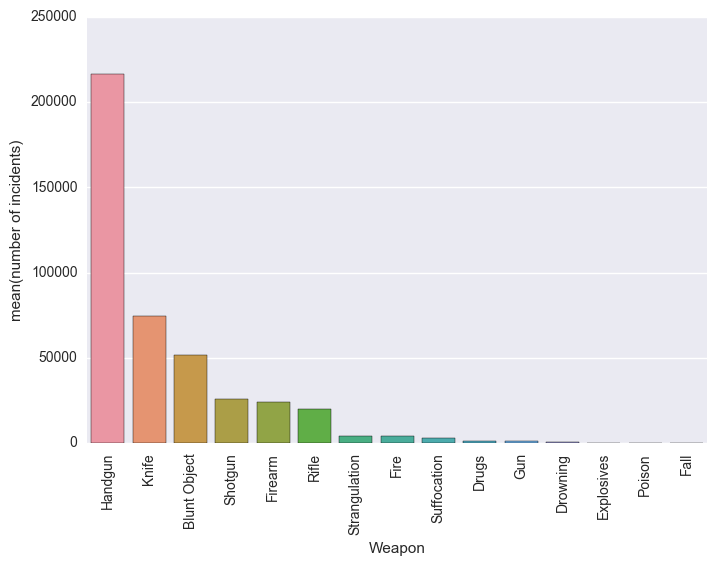

In [17]:
ax = sns.barplot(x="Weapon", y="number of incidents", data=weapon_count_df) 
ax.set_xticklabels(weapon_count_df["Weapon"], rotation=90)

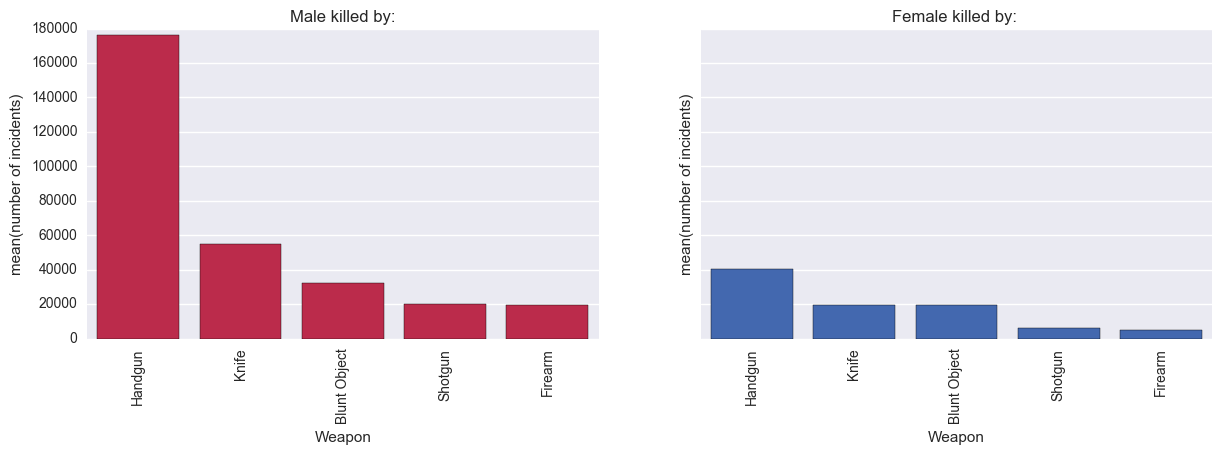

In [28]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1 = sns.barplot(x="Weapon", y="number of incidents", data=male_count_df.head(),ax=ax1,  color="#D3133E") 
ax1.set_xticklabels(weapon_count_df["Weapon"], rotation=90)
ax1.set_title('Male killed by:')
ax2 = sns.barplot(x="Weapon", y="number of incidents", data=female_count_df.head(),ax=ax2, color="#3162C1")
ax2.set_xticklabels(weapon_count_df["Weapon"], rotation=90)
ax2.set_title('Female killed by: ')
plt.subplots_adjust(right=2)

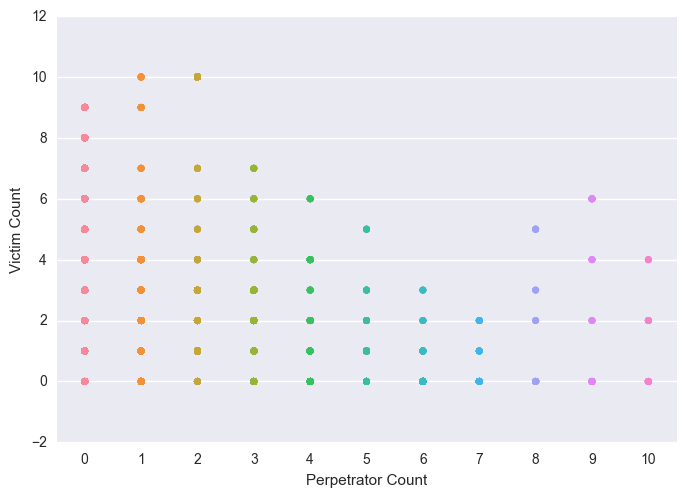

In [19]:
cx = sns.stripplot(x = 'Perpetrator Count', y = 'Victim Count', data = csv_data1)

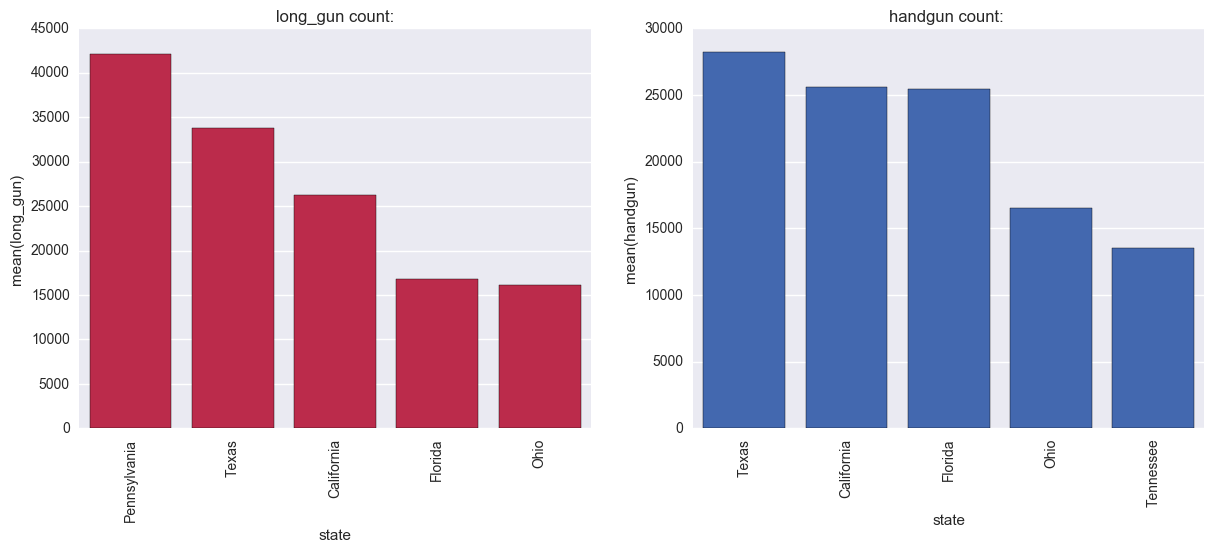

In [33]:
f, (ax1, ax2) = plt.subplots(1,2)
ax1 = sns.barplot(x="state", y="long_gun", data=State_permit_df.head(),ax=ax1,  color="#D3133E") 
ax1.set_xticklabels(State_permit_df["state"], rotation=90)
ax1.set_title('long_gun count:')
ax2 = sns.barplot(x="state", y="handgun", data=State_handgun_df.head()
                  ,ax=ax2, color="#3162C1")
ax2.set_xticklabels(State_handgun_df["state"], rotation=90)
ax2.set_title('handgun count: ')
plt.subplots_adjust(right=2,bottom=1,top=2)

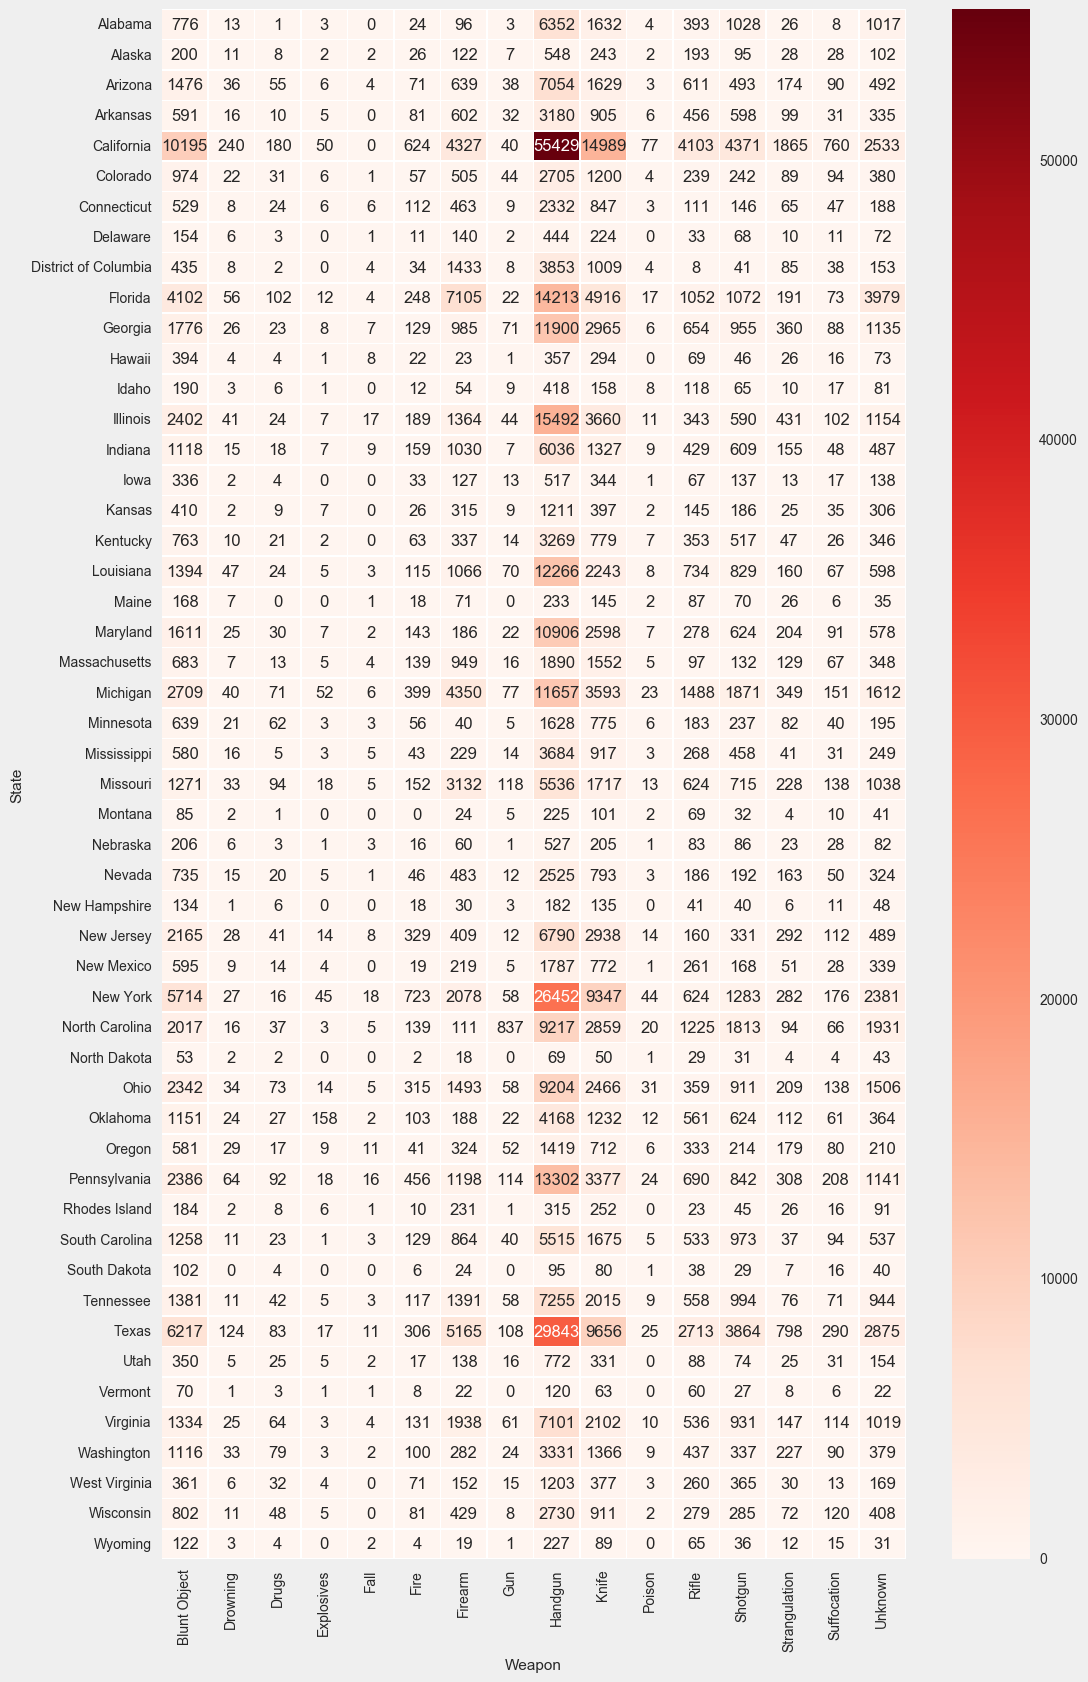

In [5]:
plt.figure(figsize=(12,20),facecolor='#efefef')
sns.set()
cmap = sns.cubehelix_palette(start=0, light=1, as_cmap=True)
sns.heatmap(pd.crosstab(csv_data1.State,csv_data1.Weapon), annot=True, fmt="d", linewidths=.5,cmap='Reds')

# Conclusion

That Higher Rates of Gun Ownership Lead to Higher Rates of Violent Crime
Rifle Association and other gun-rights proponents, who have steadfastly pushed the idea that a society with more guns leads to less crime, and that “the only way to stop a bad guy with a gun is a good guy with a gun.”

shows that gun ownership is more often a catalyst than a deterrent to crime.


In [ ]:
>> result = df.sort(['A', 'B'], ascending=[1, 0])